# Projeto 2 - Ciência dos Dados

Nome: Alexia Barbosa Pires

Nome: Ellen Coutinho Lião da Silva

Nome: Jéssica Lendaw Silva de Araújo

___
Carregando algumas bibliotecas:

In [1]:
%matplotlib inline
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Jessica\Desktop\Nova pasta\projeto 2 - cdados\22-2b-cd-p2-ellen_alexia


O projeto visa prever como se comportará, quantitativamente, a continuidade da educação primária para o sexo feminino e para o sexo masculino. 
Espaço para descrever cada variável que aparece no excel. 
Carregando a base de dados:

A base de dados é composta pelas seguintes targets:
- Country Name: nome do país 
- Country Code: identificador do país
- Anos de 1970 a 2021: razão entre a quantidade de novas matrículas na última classe do ensino primário com os alunos vigentes.
- Region: região onde o país está localizado
- IncomeGroup: faixa de renda do país


In [3]:
homens = pd.read_excel('data\homens.xls', sheet_name='Data')
homens.head(2)

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,92.037788,100.81855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
mulheres = pd.read_excel('data\mulheres.xls', sheet_name='Data')
mulheres.head(2)

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,101.255234,101.55587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Análise da qualidade dos dataframes

No mesmo arquivo excel, consta diferentes planilhas. A seguir, é feito o tratamento para que as targets acima esclarecidas estejam condensadas no mesmo espaço, para fins de organização.

In [5]:
# Organização do dataframe com dados referentes ao público feminino
mulheres_plus = pd.read_excel('data\mulheres.xls', sheet_name='Metadata - Countries')
mulheres.insert(2, 'Region',mulheres_plus['Region'],True) # insert adiciona a nova coluna na posição 2
mulheres.insert(3, 'IncomeGroup', mulheres_plus['IncomeGroup'], True)

# Organização do dataframe com dados referentes ao público masculino
homens_plus = pd.read_excel('data\homens.xls', sheet_name='Metadata - Countries')
homens.insert(2, 'Region', homens_plus['Region'], True)
homens.insert(3, 'IncomeGroup', homens_plus['IncomeGroup'], True)

# Substituição dos campos vazios da base de dados por 0
mulheres = mulheres.fillna(value=0)
homens = homens.fillna(value=0)

homens.head()

,Country Name,Country Code,Region,IncomeGroup,1970,1971,1972,1973,1974,1975,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,Latin America & Caribbean,High income,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,92.037788,100.81855,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,Africa Eastern and Southern,AFE,0,0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,Afghanistan,AFG,South Asia,Low income,0.0,0.0,0.0,0.0,28.54109,0.0,...,0.0,0.000000,0.00000,0.0,96.542091,101.294212,103.283257,102.117844,0.0,0.0
3,Africa Western and Central,AFW,0,0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,Angola,AGO,Sub-Saharan Africa,Lower middle income,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [6]:
# Remoção dos países em que não há dados
mulheres = mulheres[mulheres['Region']!=0]
mulheres = mulheres[mulheres['IncomeGroup']!=0]
homens = homens[homens['Region']!=0]
homens = homens[homens['IncomeGroup']!=0]

Além disso, é necessário analisar se há vieses presentes na organização de cada dataframe. Por conta disso, é comprovada a igualdade na quantidade de regiões analisadas para ambos os gêneros e também a disposição das classes nesse contexto.

In [7]:
mulheres['Region'].value_counts()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [8]:
homens['Region'].value_counts()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [9]:
mulheres['IncomeGroup'].value_counts()

High income            80
Lower middle income    54
Upper middle income    54
Low income             28
Name: IncomeGroup, dtype: int64

In [10]:
homens['IncomeGroup'].value_counts()

High income            80
Lower middle income    54
Upper middle income    54
Low income             28
Name: IncomeGroup, dtype: int64

### Início da análise exploratória

O próximo passo é definir para o Python quem são as variáveis qualitativas e quem são as variáveis quantitativas, pois essa diferenciação afeta nas relações posteriores. Além disso, em "IncomeGroup" há aspecto de hierarquia, então é conveniente apontar a ordem das faixas de renda na programação.

In [11]:
lista_ambos = [mulheres, homens] #Lista útil para quando um mesmo procedimento for válido para ambos os dataframes

for df in lista_ambos:
    df['Region'] = df['Region'].astype('category')
    df['IncomeGroup'] = df['IncomeGroup'].astype('category')
    df['IncomeGroup'].cat.categories = ['High income', 'Lower middle income', 'Upper middle income', 'Low income']
    
    # Ajuste da ordem das faixas de renda
    df['IncomeGroup']=pd.Categorical(df.IncomeGroup, categories = ['High income', 'Upper middle income', 'Lower middle income',
                                                                   'Low income'], ordered=True)

In [12]:
print(f'Hierarquia em IncomeGroup: {mulheres.IncomeGroup.cat.ordered}')

Hierarquia em IncomeGroup: True


### Restrição regional da temática

A restrição por regiões é adotada para a compreensão de como se comporta graficamente a educação para cada sexo no decorrer do tempo. O objetivo dessa seção é unir, em um novo conjunto de dados, a relação temporal da educação para cada região considerando as faixas de renda.

In [13]:
regioes_mulheres = [] # Lista para a média da educação das regiões. Cada posição representa um ano
regioes_homens = []   # Lista para a média da educação das regiões. Cada posição representa um ano
anos = np.arange(1970,2021+1,1)   # Lista com todos os anos presentes no dataframe

In [14]:
# Todas as regiões podem ser vistas através do comando. A ordem desse output será adotada nas listas a seguir.
mulheres.Region.cat.categories

Index(['East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Asia', 'Sub-Saharan Africa'],
      dtype='object')

In [15]:
homens.IncomeGroup.cat.categories

Index(['High income', 'Upper middle income', 'Lower middle income',
       'Low income'],
      dtype='object')

In [16]:
# Adicionadas as regiões e níveis de renda em suas respectivas listas
regioes = ['East Asia & Pacific', 'Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 
           'North America', 'South Asia', 'Sub-Saharan Africa']
renda = ['High income', 'Upper middle income', 'Lower middle income','Low income']

In [17]:
lista_mulheres = []
lista_homens = []
    
for area in regioes:
    dicio_mulheres = {}
    dicio_homens = {}
    
    for ano in anos:
        media_mulheres = mulheres.loc[(mulheres['Region']==area),:][str(ano)].mean()
        dicio_mulheres[ano] = media_mulheres
        
        media_homens = homens.loc[(homens['Region']==area),:][str(ano)].mean()
        dicio_homens[ano] = media_homens

    lista_mulheres.append(dicio_mulheres)
    lista_homens.append(dicio_homens)

df_mulheres = pd.DataFrame(lista_mulheres)
df_homens = pd.DataFrame(lista_homens)

new_lista_ambos = [df_mulheres, df_homens] # Assim como feito anteriormente, essa lista serve para otimização

for df in new_lista_ambos:
    df.insert(0,"Region", regioes, True)


In [18]:
# Adicionando fatores de renda
qtd_renda_m = []
qtd_renda_h = []

for faixa in renda:
    renda_particular_m = []
    renda_particular_h = []
    
    for region in regioes:
        filtro_feminino = mulheres.loc[(mulheres['Region']==region)&(mulheres['IncomeGroup']==faixa),:]
        filtro_masculino = homens.loc[(homens['Region']==region)&(homens['IncomeGroup']==faixa),:]
        renda_particular_m.append(len(filtro_feminino)) 
        renda_particular_h.append(len(filtro_masculino))
    qtd_renda_m.append(renda_particular_m)
    qtd_renda_h.append(renda_particular_h)

j = 1
k = 0

for i in range(4):
    df_mulheres.insert(j, renda[k], qtd_renda_m[i], True)
    df_homens.insert(j, renda[k], qtd_renda_h[i], True)
    k+=1
    j+=1
        
df_homens.head(5)

,Region,High income,Upper middle income,Lower middle income,Low income,1970,1971,1972,1973,1974,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,East Asia & Pacific,13,14,1,9,8.203736,11.297164,18.680054,16.662033,17.530675,...,61.921667,64.750360,68.270756,58.357257,64.494314,60.348564,63.279995,68.576365,38.519324,0.000000
1,Europe & Central Asia,38,4,0,16,2.497487,17.053915,18.992525,19.457704,16.015816,...,57.472287,55.248647,61.937363,62.663581,65.485352,63.846852,59.105976,59.416440,26.189778,0.000000
2,Latin America & Caribbean,17,5,0,19,11.000448,22.822799,25.695980,24.625499,25.615352,...,66.022134,69.469284,66.197301,56.061764,58.506926,57.152793,59.034007,51.748760,43.199376,0.000000
3,Middle East & North Africa,8,8,2,3,13.064918,22.402088,25.710457,21.834238,28.495292,...,53.783885,58.424802,60.299637,61.795841,61.804055,63.975919,53.513077,64.035972,35.634776,3.161584
4,North America,3,0,0,0,0.000000,0.000000,0.000000,0.000000,22.269918,...,69.096288,67.683543,34.511492,34.378583,35.018270,0.000000,34.119540,0.000000,0.000000,0.000000


Por essa restrição, permance-se sendo avaliada os seguintes pontos:
- Region: região que abrange o país
- Anos de 1970 a 2021: média da razão entre novos alunos matriculados na última classe do primário com os demais alunos de todos os países na região.
- High income: quantidade de países considerados de classe alta na região
- Upper middle income: quantidade de países considerados de classe média-alta na região
- Lower middle income: quantidade de países considerados de classe média-baixa na região
- Low income: quantidade de países considerados de classe baixa na região

#### Análise gráfica dos índices educacionais

Região do leste da Ásia e Pacífico:

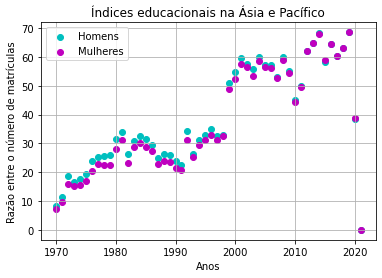

In [19]:
asia_feminina = df_mulheres.loc[df_mulheres['Region']=='East Asia & Pacific',:]
asia_masculina = df_homens.loc[df_homens['Region']=='East Asia & Pacific',:]

eixo_x0 = anos
eixo_y0_mulheres = []
eixo_y0_homens = []

for ano in anos:
    eixo_y0_mulheres.append(asia_feminina[ano])
    eixo_y0_homens.append(asia_masculina[ano])

plt.scatter(eixo_x0, eixo_y0_homens, color = 'c')
plt.scatter(eixo_x0, eixo_y0_mulheres, color = 'm')
plt.legend(["Homens","Mulheres"]) 
plt.xlabel('Anos')
plt.ylabel('Razão entre o número de matrículas')
plt.title('Índices educacionais na Ásia e Pacífico')
plt.grid()

Região da Europa e Ásia central:

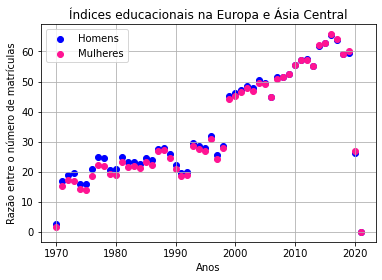

In [20]:
europa_feminina = df_mulheres.loc[df_mulheres['Region']=='Europe & Central Asia',:]
europa_masculina = df_homens.loc[df_homens['Region']=='Europe & Central Asia',:]
eixo_x1 = anos
eixo_y1_mulheres = []
eixo_y1_homens = []

for ano in anos:
    eixo_y1_mulheres.append(europa_feminina[ano])
    eixo_y1_homens.append(europa_masculina[ano])
    
plt.scatter(eixo_x1, eixo_y1_homens, color = 'b')
plt.scatter(eixo_x1, eixo_y1_mulheres, color = 'deeppink')
plt.legend(["Homens","Mulheres"]) 
plt.xlabel('Anos')
plt.ylabel('Razão entre o número de matrículas')
plt.title('Índices educacionais na Europa e Ásia Central')
plt.grid()

Região da Ámerica Latina e do Caribe:

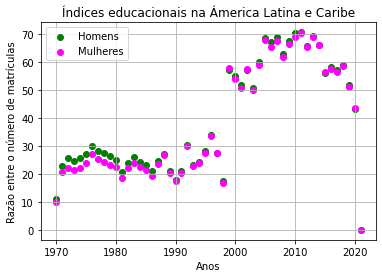

In [21]:
america_feminina = df_mulheres.loc[df_mulheres['Region']=='Latin America & Caribbean',:]
america_masculina = df_homens.loc[df_homens['Region']=='Latin America & Caribbean',:]

eixo_x2 = anos
eixo_y2_mulheres = []
eixo_y2_homens = []

for ano in anos:
    eixo_y2_mulheres.append(america_feminina[ano])
    eixo_y2_homens.append(america_masculina[ano])
    
plt.scatter(eixo_x2, eixo_y2_homens, color = 'g')
plt.scatter(eixo_x2, eixo_y2_mulheres, color = 'magenta')
plt.legend(["Homens","Mulheres"]) 
plt.xlabel('Anos')
plt.ylabel('Razão entre o número de matrículas')
plt.title('Índices educacionais na Ámerica Latina e Caribe')
plt.grid()

Região do Oriente Médio e Norte da África:

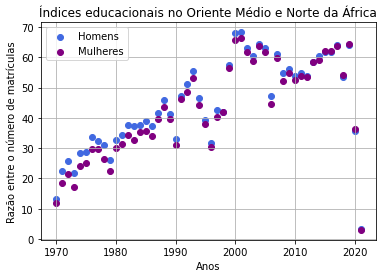

In [22]:
orientemedio_feminina = df_mulheres.loc[df_mulheres['Region']=='Middle East & North Africa',:]
orientemedio_masculina = df_homens.loc[df_homens['Region']=='Middle East & North Africa',:]

eixo_x3 = anos
eixo_y3_mulheres = []
eixo_y3_homens = []

for ano in anos:
    eixo_y3_mulheres.append(orientemedio_feminina[ano])
    eixo_y3_homens.append(orientemedio_masculina[ano])
    
plt.scatter(eixo_x3, eixo_y3_homens, color = 'royalblue')
plt.scatter(eixo_x3, eixo_y3_mulheres, color = 'purple')
plt.legend(["Homens","Mulheres"]) 
plt.xlabel('Anos')
plt.ylabel('Razão entre o número de matrículas')
plt.title('Índices educacionais no Oriente Médio e Norte da África')
plt.grid()

Região da América do Norte:

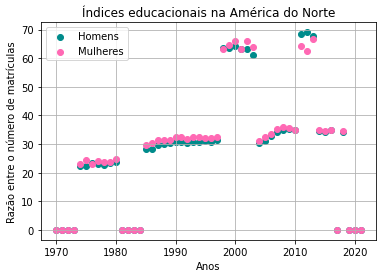

In [23]:
americadonorte_feminina = df_mulheres.loc[df_mulheres['Region']=='North America',:]
americadonorte_masculina = df_homens.loc[df_homens['Region']=='North America',:]

eixo_x4 = anos
eixo_y4_mulheres = []
eixo_y4_homens = []

for ano in anos:
    eixo_y4_mulheres.append(americadonorte_feminina[ano])
    eixo_y4_homens.append(americadonorte_masculina[ano])
    
plt.scatter(eixo_x4, eixo_y4_homens, color = 'darkcyan')
plt.scatter(eixo_x4, eixo_y4_mulheres, color = 'hotpink')
plt.legend(["Homens","Mulheres"]) 
plt.xlabel('Anos')
plt.ylabel('Razão entre o número de matrículas')
plt.title('Índices educacionais na América do Norte')
plt.grid()

Região do Sul da Ásia:

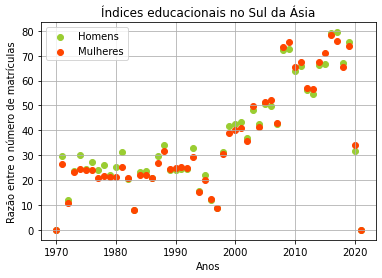

In [24]:
sul_asia_feminina = df_mulheres.loc[df_mulheres['Region']=='South Asia',:]
sul_asia_masculina = df_homens.loc[df_homens['Region']=='South Asia',:]

eixo_x5 = anos
eixo_y5_mulheres = []
eixo_y5_homens = []

for ano in anos:
    eixo_y5_mulheres.append(sul_asia_feminina[ano])
    eixo_y5_homens.append(sul_asia_masculina[ano])
    
plt.scatter(eixo_x5, eixo_y5_homens, color = 'yellowgreen')
plt.scatter(eixo_x5, eixo_y5_mulheres, color = 'orangered')
plt.legend(["Homens","Mulheres"]) 
plt.xlabel('Anos')
plt.ylabel('Razão entre o número de matrículas')
plt.title('Índices educacionais no Sul da Ásia')
plt.grid()

Região da Áfria Subsaariana:

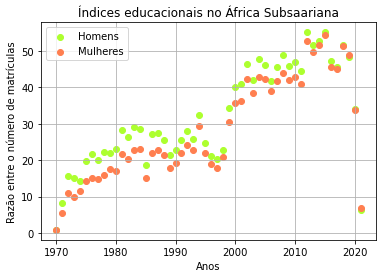

In [25]:
subsaariana_feminina = df_mulheres.loc[df_mulheres['Region']=='Sub-Saharan Africa',:]
subsaariana_masculina = df_homens.loc[df_homens['Region']=='Sub-Saharan Africa',:]

eixo_x6 = anos
eixo_y6_mulheres = []
eixo_y6_homens = []

for ano in anos:
    eixo_y6_mulheres.append(subsaariana_feminina[ano])
    eixo_y6_homens.append(subsaariana_masculina[ano])
    
plt.scatter(eixo_x6, eixo_y6_homens, color = 'greenyellow')
plt.scatter(eixo_x6, eixo_y6_mulheres, color = 'coral')
plt.legend(["Homens","Mulheres"]) 
plt.xlabel('Anos')
plt.ylabel('Razão entre o número de matrículas')
plt.title('Índices educacionais no África Subsaariana')
plt.grid()